<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Paula Alejandra Carreño Pérez
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, Análisis y tratamiento de datos</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [15]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [16]:
datos = pd.read_excel('Datos-azul-timol.xlsx')

In [17]:
datos

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Espectro UV-Vis,Unnamed: 8
0,Muestra,Absorbancia,Muestra,Absorbancia,Muestra,Absorbancia,[Molar],Longitud de onda,Absorbancia
1,Blanco,0.002,Blanco,0.002,Blanco,0.002,NaN,400,0.126
2,Patrón 1,0.1,Patrón 1,0.09,Patrón 1,0.089,0.000003,400.5,0.125
3,Blanco,0,Blanco,0,Blanco,-0.001,NaN,401,0.122
4,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,0.00001,401.5,0.121
...,...,...,...,...,...,...,...,...,...
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798,-0.004
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798.5,-0.004
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799,-0.004
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.5,-0.004


In [18]:
datos.columns

Index(['Azul de timol (596 nm)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Espectro UV-Vis',
       'Unnamed: 8'],
      dtype='object')

In [19]:
Datos1=datos.drop([0])
Datos1

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Espectro UV-Vis,Unnamed: 8
1,Blanco,0.002,Blanco,0.002,Blanco,0.002,NaN,400,0.126
2,Patrón 1,0.1,Patrón 1,0.09,Patrón 1,0.089,0.000003,400.5,0.125
3,Blanco,0,Blanco,0,Blanco,-0.001,NaN,401,0.122
4,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,0.00001,401.5,0.121
5,Blanco,-0.001,Blanco,-0.001,Blanco,-0.002,NaN,402,0.119
...,...,...,...,...,...,...,...,...,...
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798,-0.004
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798.5,-0.004
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799,-0.004
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.5,-0.004


In [20]:
# Filtrado de columnas y filas 
DatosF= datos[["Azul de timol (596 nm)","Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 6"]][0:19]
DatosF

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 6
0,Muestra,Absorbancia,Absorbancia,Absorbancia,[Molar]
1,Blanco,0.002,0.002,0.002,NaN
2,Patrón 1,0.1,0.09,0.089,0.000003
3,Blanco,0,0,-0.001,NaN
4,Patrón 2,0.276,0.267,0.267,0.00001
5,Blanco,-0.001,-0.001,-0.002,NaN
6,Patrón 3,0.484,0.482,0.483,0.000017
7,Blanco,-0.001,0.001,0.001,NaN
8,Patrón 4,0.674,0.66,0.659,0.000024
9,Blanco,0.001,0.001,0,NaN


In [21]:
DatosF1=DatosF.drop([1,3,5,7,9,11,13,15,17], axis=0)
DatosF1

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 6
0,Muestra,Absorbancia,Absorbancia,Absorbancia,[Molar]
2,Patrón 1,0.1,0.09,0.089,0.000003
4,Patrón 2,0.276,0.267,0.267,0.00001
6,Patrón 3,0.484,0.482,0.483,0.000017
8,Patrón 4,0.674,0.66,0.659,0.000024
10,Patrón 5,0.877,0.877,0.877,0.000031
12,Patrón 6,1.042,1.04,1.04,0.000038
14,Patrón 7,1.267,1.267,1.266,0.000045
16,Patrón 8,1.479,1.478,1.477,0.000052
18,Patrón 9,1.644,1.64,1.688,0.000059


In [22]:
DatosC=DatosF1.drop([0], axis=0)
DatosC

,Azul de timol (596 nm),Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 6
2,Patrón 1,0.1,0.09,0.089,0.000003
4,Patrón 2,0.276,0.267,0.267,0.00001
6,Patrón 3,0.484,0.482,0.483,0.000017
8,Patrón 4,0.674,0.66,0.659,0.000024
10,Patrón 5,0.877,0.877,0.877,0.000031
12,Patrón 6,1.042,1.04,1.04,0.000038
14,Patrón 7,1.267,1.267,1.266,0.000045
16,Patrón 8,1.479,1.478,1.477,0.000052
18,Patrón 9,1.644,1.64,1.688,0.000059


In [23]:
Datosm=DatosC.set_axis(['Muestra','Abs 1', 'Abs 2', 'Abs 3', '[M]'], axis=1)
Datosm

,Muestra,Abs 1,Abs 2,Abs 3,[M]
2,Patrón 1,0.1,0.09,0.089,0.000003
4,Patrón 2,0.276,0.267,0.267,0.00001
6,Patrón 3,0.484,0.482,0.483,0.000017
8,Patrón 4,0.674,0.66,0.659,0.000024
10,Patrón 5,0.877,0.877,0.877,0.000031
12,Patrón 6,1.042,1.04,1.04,0.000038
14,Patrón 7,1.267,1.267,1.266,0.000045
16,Patrón 8,1.479,1.478,1.477,0.000052
18,Patrón 9,1.644,1.64,1.688,0.000059


In [24]:
Datosm['Promedio']= Datosm[['Abs 1', 'Abs 2', 'Abs 3']].mean(axis=1)

In [25]:
Datosm

,Muestra,Abs 1,Abs 2,Abs 3,[M],Promedio
2,Patrón 1,0.1,0.09,0.089,0.000003,0.093000
4,Patrón 2,0.276,0.267,0.267,0.00001,0.270000
6,Patrón 3,0.484,0.482,0.483,0.000017,0.483000
8,Patrón 4,0.674,0.66,0.659,0.000024,0.664333
10,Patrón 5,0.877,0.877,0.877,0.000031,0.877000
12,Patrón 6,1.042,1.04,1.04,0.000038,1.040667
14,Patrón 7,1.267,1.267,1.266,0.000045,1.266667
16,Patrón 8,1.479,1.478,1.477,0.000052,1.478000
18,Patrón 9,1.644,1.64,1.688,0.000059,1.657333


In [26]:
Datos_curva=Datosm.drop(['Abs 1', 'Abs 2', 'Abs 3'], axis=1)
Datos_curva

,Muestra,[M],Promedio
2,Patrón 1,0.000003,0.093000
4,Patrón 2,0.00001,0.270000
6,Patrón 3,0.000017,0.483000
8,Patrón 4,0.000024,0.664333
10,Patrón 5,0.000031,0.877000
12,Patrón 6,0.000038,1.040667
14,Patrón 7,0.000045,1.266667
16,Patrón 8,0.000052,1.478000
18,Patrón 9,0.000059,1.657333


In [27]:
import sklearn.metrics as skm
from sklearn import linear_model
x1=Datos_curva[['[M]']]
y1=Datos_curva[['Promedio']]
reg = linear_model.LinearRegression()
reg.fit(x1, y1)
y1_pred = reg.predict(x1)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y1, y1_pred)
r2=skm.r2_score(y1, y1_pred)

In [32]:
y1_pred

array([[0.08166667],
       [0.27875   ],
       [0.47583333],
       [0.67291667],
       [0.87      ],
       [1.06708333],
       [1.26416667],
       [1.46125   ],
       [1.65833333]])

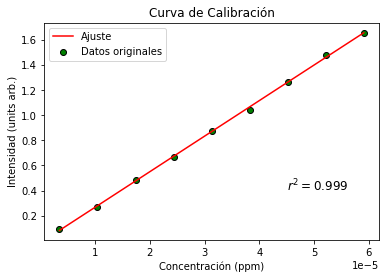

In [33]:
vfig, ax= plt.subplots()
ax.scatter(x1, y1, color='green', label='Datos originales', edgecolors='black')
ax.plot(np.array(x1), np.array(y1_pred), color='red', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (ppm)")
ax.set_ylabel("Intensidad (units arb.)")
ax.text(0.000045,0.4, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()

In [36]:
Datos_curva['Desviación']= Datosm[['Abs 1','Abs 2','Abs 3']].std(axis=1)
Datos_curva


,Muestra,[M],Promedio,Desviación
2,Patrón 1,0.000003,0.093000,6.082763e-03
4,Patrón 2,0.00001,0.270000,5.196152e-03
6,Patrón 3,0.000017,0.483000,1.000000e-03
8,Patrón 4,0.000024,0.664333,8.386497e-03
10,Patrón 5,0.000031,0.877000,1.359740e-16
12,Patrón 6,0.000038,1.040667,1.154701e-03
14,Patrón 7,0.000045,1.266667,5.773503e-04
16,Patrón 8,0.000052,1.478000,1.000000e-03
18,Patrón 9,0.000059,1.657333,2.663331e-02


In [45]:
Yerror = Datos_curva['Desviación']

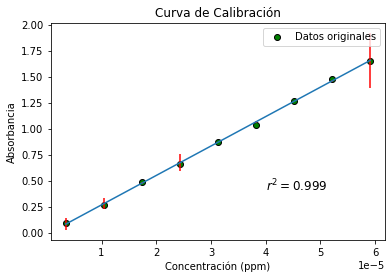

In [85]:
fig, ax= plt.subplots()
ax.scatter(x1, y1, color='green', label='Datos originales', edgecolors='black')
ax.errorbar(np.array(x1), np.array(y1_pred), yerr=10*np.array(Yerror), ecolor='red')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (ppm)")
ax.set_ylabel("Absorbancia")
ax.text(0.00004,0.4, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()

In [75]:
#Las barras de error son muy pequeñas y multiplique por 10 para que se puedan ver mejor

### <font color=orange> SEGUNDA PARTE

In [28]:
espectros = pd.read_excel('ASCI_IR.xlsx', header=None)
propiedad1 = pd.read_excel('Informacion Crudos20.xlsx', header=None, usecols=[10], nrows=84)
propiedad2 = pd.read_excel('Informacion Crudos20.xlsx',header=None, usecols=[11], nrows=84) 

f= pd.DataFrame(espectros)
esp= f.drop(f.index[[0]])
espectro= esp.values
espect = espectro.T
espec = pd.DataFrame(espect)

a1= pd.DataFrame(propiedad1)
b1 = a1.drop(a1.index[[0]])
c1 = b1.drop(b1.index[[0]])
prop1 = pd.DataFrame(c1)
prop1.reset_index(inplace=True, drop=True)

a2 = pd.DataFrame(propiedad2)
b2 = a2.drop(a1.index[[0]])
c2 = b2.drop(b1.index[[0]])
prop2 = pd.DataFrame(c2)
prop2.reset_index(inplace=True, drop=True)


In [29]:
data1 = pd.concat([prop1, espec], axis=1, ignore_index=True)
datnan1 = data1.dropna()
datnan1.shape

(59, 7469)

In [30]:
data2 = pd.concat([prop2, espec], axis=1, ignore_index=True)
datnan2 = data2.dropna()
datnan2.shape

(60, 7469)

In [41]:
dataseñal1 = np.array(datnan1.drop(datnan1.index[[0]], axis=1))           
dataseñal2 = np.array(datnan2.drop(datnan2.index[[0]], axis=1))
dataprop1 = np.array(datnan1[[0]])
dataprop2 = np.array(datnan2[[0]])  

In [42]:
dataseñal1.shape, dataseñal2.shape,dataprop1.shape , dataprop2.shape 

((59, 7468), (60, 7468), (59, 1), (60, 1))

In [56]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

### <font color=orange> Ahora se normaliza

In [74]:
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(dataseñal1)
x_scaled=scaler.transform(dataseñal1)
x_norm = preprocessing.normalize(dataseñal1, norm='l1')


In [75]:
scaler1 = StandardScaler()
norma1 = Normalizer()

scaler1.fit(dataseñal2)
x_scaled1 = scaler1.transform(dataseñal2)
x_norm1 = preprocessing.normalize(dataseñal2, norm='l1')


MSE 1 = 35.65
MSE 2 = 16.89


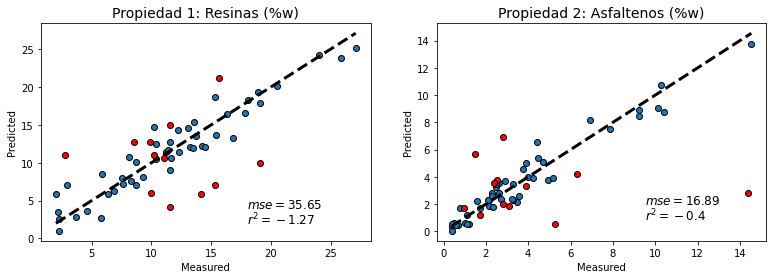

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, dataprop1, train_size=0.8, random_state=4, shuffle= True)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_norm1, dataprop2, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)
pls1 = PLSRegression(n_components=10)
pls1.fit(x_train1, y_train1)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
y_pred1 = pls1.predict(x_train1)
y_pred_test1 = pls1.predict(x_test1)

fig, ax = plt.subplots(1, 2, figsize=(13,4))
ax[0].scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax[0].scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax[0].text(18,4, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax[0].text(18,1.8, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax[0].set_xlabel('Measured')
ax[0].set_ylabel('Predicted')
ax[0].set_title("Propiedad 1: Resinas (%w)", fontsize=14)

ax[1].scatter(y_train1, y_pred1, edgecolors=(0, 0, 0))
ax[1].scatter(y_test1, y_pred_test1, color='red', edgecolors=(0, 0, 0))
ax[1].plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], 'k--', lw=3)
ax[1].text(9.5, 2, r"$mse = "+str(round(mean_squared_error(y_test1, y_pred_test1), 2))+r"$", fontsize=12, color="black")
ax[1].text(9.5, 0.8, r"$r^2 = "+str(round(r2_score(y_test1, y_pred_test1), 2))+r"$", fontsize=12, color="black")
ax[1].set_xlabel('Measured')
ax[1].set_ylabel('Predicted')
ax[1].set_title("Propiedad 2: Asfaltenos (%w)", fontsize=14)

print('MSE 1 = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))
print('MSE 2 = ' + str(round(mean_squared_error(y_test1, y_pred_test1), 2)))

In [112]:
def optimise_pls(x1, y1, xt1, n_comp1):
    
    # Definimos PLS y el número de componentes
    pls1 = PLSRegression(n_components=n_comp1)
    pls1.fit(x1, y1)
    y_pred111 = pls1.predict(x1)
    y_pred21 = pls.predict(xt1)
    # Calculamos métricas
    r21 = r2_score(y1, y_pred111)
    mse1 = mean_squared_error(y1, y_pred111)
    rpd1 = y1.std()/np.sqrt(mse)
    
    return (y_pred111, y_pred21, r21, mse1, rpd1)

RANDOM STATE

In [113]:
r2s1 = []
mses1 = []
rpds1 = []
yp11 = []
yp21 = []
arr_comp1 = np.arange(1, 31)
for n_comp1 in arr_comp1:
    y_pred111, y_pred21, r21, mse1, rpd1 = optimise_pls(x_train1, y_train1, x_test1, n_comp1)
    r2s1.append(r21)
    mses1.append(mse1)
    rpds1.append(rpd1)
    yp11.append(y_pred111)
    yp21.append(y_pred21)

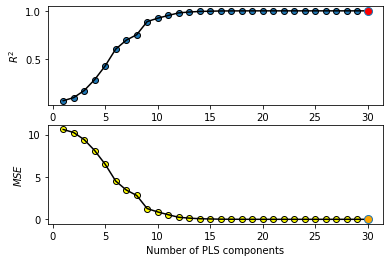

In [114]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.scatter(arr_comp1, r2s1, edgecolors=(0, 0, 0))
ax1.plot(arr_comp1, r2s1, 'k-')
ax1.plot(arr_comp1[np.argmax(r2s1)], np.array(r2s1)[np.argmax(r2s1)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp1, mses1, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp1, mses1, 'k-')
ax2.plot(arr_comp1[np.argmin(mses1)], np.array(mses1)[np.argmin(mses1)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

In [115]:
r2s1 = []
mses1 = []
rpds1 = []
yp11 = []
yp21 = []
rs1 = np.arange(1, 101)
for rs11 in rs1:
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_norm1, dataprop2, train_size=0.8, random_state=rs11, shuffle= True)
    y_pred111, y_pred21, r21, mse1, rpd1 = optimise_pls(x_train1, y_train1, x_test1, 10)
    r2s1.append(r21)
    mses1.append(mse1)
    rpds1.append(rpd1)
    yp11.append(y_pred111)
    yp21.append(y_pred21)

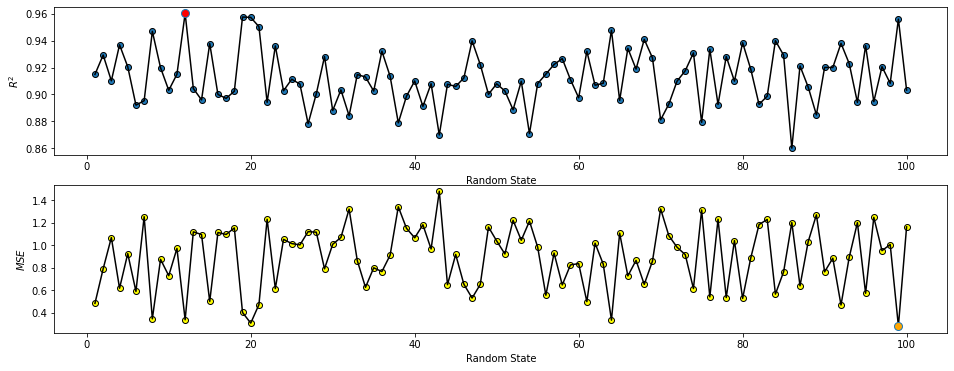

In [99]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,6))

ax1.scatter(rs1, r2s1, edgecolors=(0, 0, 0))
ax1.plot(rs1, r2s1, 'k-')
ax1.plot(rs1[np.argmax(r2s1)], np.array(r2s1)[np.argmax(r2s1)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Random State')
ax1.set_ylabel('$R^2$')

ax2.scatter(rs1, mses1, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(rs1, mses1, 'k-')
ax2.plot(rs1[np.argmin(mses1)], np.array(mses1)[np.argmin(mses1)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Random State')
ax2.set_ylabel('$MSE$')
plt.show()

### <font color=orange> Se hará el modelo usando RS=20

In [170]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf1 = KFold(n_splits=5, shuffle=True, random_state=20) 
model1=PLSRegression(n_components=10) 
x_traint1 = []  
x_testt1 = [] 
y_traint1 = []
y_testt1 = []
r2s1 = []
mses1 = []
i1 = 1
for train_index1, test_index1 in kf1.split(x_norm1):
    x_train1 = x_norm1[train_index1]
    x_test1 = x_norm1[test_index1]
    y_train1 = dataprop2[train_index1]
    y_test1 = dataprop2[test_index1]
    model1.fit(x_train1, y_train1) 
    mse1 = mean_squared_error(y_test1, model1.predict(x_test1))
    r21= r2_score(y_test1, model1.predict(x_test1))
    
    x_traint1.append(x_train1) 
    x_testt1.append(x_test1)
    y_traint1.append(y_train1)
    y_testt1.append(y_test1)
    r2s1.append(r21)
    mses1.append(mse1)
    model1.fit(x_train1, y_train1) #Training the model
    print(f"MSE. {i1} on the test set: {mean_squared_error(y_test1, model1.predict(x_test1))}")
    print(f"R2. {i1} on the test set: {r2_score(y_test1, model1.predict(x_test1))}")
    i1 += 1

MSE. 1 on the test set: 28.87163399513936
R2. 1 on the test set: -0.3164808243676229
MSE. 2 on the test set: 5.694483711912196
R2. 2 on the test set: -1.0043417029878325
MSE. 3 on the test set: 17.52645710484305
R2. 3 on the test set: -0.6013953640535914
MSE. 4 on the test set: 12.30029516191963
R2. 4 on the test set: -0.48907124547028435
MSE. 5 on the test set: 9.628032806001217
R2. 5 on the test set: -0.9549801377702412


### <font color=orange> Ahora modelo haciendo RS = 99

In [163]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf11 = KFold(n_splits=5, shuffle=True, random_state=99) 
model11=PLSRegression(n_components=10) 

x_traint11 = []  
x_testt11 = [] 
y_traint11 = []
y_testt11 = []
r2s11 = []
mses11 = []

i11 = 1
for train_index11, test_index11 in kf11.split(x_norm1):
    x_train11 = x_norm1[train_index11]
    x_test11 = x_norm1[test_index11]
    y_train11 = dataprop2[train_index11]
    y_test11 = dataprop2[test_index11]
    model11.fit(x_train11, y_train11) 
    mse11 = mean_squared_error(y_test11, model11.predict(x_test11))
    r211= r2_score(y_test11, model11.predict(x_test11))
    
    x_traint11.append(x_train11) 
    x_testt11.append(x_test11)
    y_traint11.append(y_train11)
    y_testt11.append(y_test11)
    r2s11.append(r211)
    mses11.append(mse11)
    
    model11.fit(x_train11, y_train11) #Training the model
    print(f"MSE. {i11} on the test set: {mean_squared_error(y_test11, model11.predict(x_test11))}")
    print(f"R2. {i11} on the test set: {r2_score(y_test11, model11.predict(x_test11))}")
    i11 += 1

MSE. 1 on the test set: 23.949211875296953
R2. 1 on the test set: -0.0781656456330313
MSE. 2 on the test set: 11.81428463148819
R2. 2 on the test set: -0.5652984506385785
MSE. 3 on the test set: 13.915149433980865
R2. 3 on the test set: -0.68036234582797
MSE. 4 on the test set: 3.7657874703198098
R2. 4 on the test set: 0.0064598927113622695
MSE. 5 on the test set: 12.094086264904112
R2. 5 on the test set: -1.3364809619274767


### <font color=orange> MODELO PLS
    

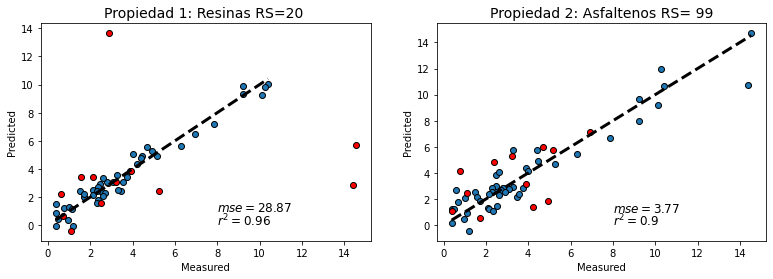

In [173]:
y_tr1=np.array(y_traint1[r2s1.index(max(r2s1))])
y_te1=np.array(y_testt1[r2s1.index(max(r2s1))]) 
X_tr1=np.array(x_traint1[r2s1.index(max(r2s1))]) 
X_te1=np.array(x_testt1[r2s1.index(max(r2s1))])
model1.fit(X_tr1, y_tr1) 


y_tr11=np.array(y_traint11[r2s11.index(max(r2s11))])
y_te11=np.array(y_testt11[r2s11.index(max(r2s11))]) 
X_tr11=np.array(x_traint11[r2s11.index(max(r2s11))]) 
X_te11=np.array(x_testt11[r2s11.index(max(r2s11))])
model11.fit(X_tr11, y_tr11)

Y_pred1 = model1.predict(X_tr1) 
Y_pred_test1 = model1.predict(X_te1) 

Y_pred11 = model11.predict(X_tr11) 
Y_pred_test11 = model11.predict(X_te11) 


fig, ax = plt.subplots(1, 2, figsize=(13,4))
ax[0].scatter(y_tr1, Y_pred1, edgecolors=(0, 0, 0))
ax[0].scatter(y_te1, Y_pred_test1, color='red', label='test set', edgecolors=(0, 0, 0))
ax[0].plot([y_tr1.min(), y_tr1.max()], [y_tr1.min(), y_tr1.max()], 'k--', lw=3)
ax[0].text(8,1, r"$mse = "+str(round(mean_squared_error(y_te1, Y_pred_test1), 2))+r"$", fontsize=12, color="black")
ax[0].text(8,0, r"$r^2 = "+str(round(r2_score(y_tr1, Y_pred1), 2))+r"$", fontsize=12, color="black")
ax[0].set_xlabel('Measured')
ax[0].set_ylabel('Predicted')
ax[0].set_title("Propiedad 1: Resinas RS=20 ", fontsize=14)

ax[1].scatter(y_tr11, Y_pred11, edgecolors=(0, 0, 0))
ax[1].scatter(y_te11, Y_pred_test11, color='red', label='test set', edgecolors=(0, 0, 0))
ax[1].plot([y_tr11.min(), y_tr11.max()], [y_tr11.min(), y_tr11.max()], 'k--', lw=3)
ax[1].text(8, 1, r"$mse = "+str(round(mean_squared_error(y_te11, Y_pred_test11), 2))+r"$", fontsize=12, color="black")
ax[1].text(8, 0, r"$r^2 = "+str(round(r2_score(y_tr11, Y_pred11), 2))+r"$", fontsize=12, color="black")
ax[1].set_xlabel('Measured')
ax[1].set_ylabel('Predicted')
ax[1].set_title("Propiedad 2: Asfaltenos RS= 99", fontsize=14)
plt.show()

